### [Regression Data Analysis]
# KaKR House Price Prediction

---

# \# Data Description

> `features` : 20  


> `label` : 1

#### \# Target Value
- **`price` : 집의 가격**

#### \# ID
- `ID` : 집을 구분하는 번호

#### \# Date columns
- `date` : 집을 구매한 날짜


- `yr_built` : 지어진 년도


- `yr_renovated` : 집을 재건축한 년도

#### \# House Conditions

- `bedrooms` : 침실의 수


- `bathrooms` : 침실 개수 당 화장실의 수( 화장실의 수 / 침실의 수 )


- `floors` : 집의 층 수


- `waterfront` : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)


- `view` : 집이 얼마나 좋아 보이는지의 정도


- `condition` : 집의 전반적인 상태


- `grade` : King County grading 시스템 기준으로 매긴 집의 등급

#### \# Location

- `zipcode` : 우편번호


- `lat` : 위도


- `long` : 경도

#### \# Area
- `sqft_living` : 주거 공간의 평방 피트(면적)


- `sqft_lot` : 부지의 평방 피트(면적)


- `sqft_above` : 지하실을 제외한 평방 피트(면적)


- `sqft_basement` : 지하실의 평방 피트(면적)


- `sqft_living15` : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)


- `sqft_lot15` : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

# \# Load Dataset

- 데이터 출처: [KaKR HousePrice Competition](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)  

In [91]:
data = pd.read_csv("./data/train.csv", index_col=['id'])
test = pd.read_csv("./data/test.csv", index_col=['id'])

### DataType 확인

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15034
Data columns (total 20 columns):
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 2.4+ MB


# \# Target Value : `price`

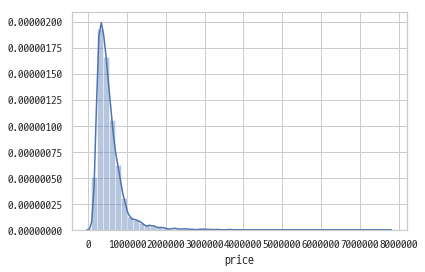

In [92]:
sns.distplot(data['price'])
plt.show()

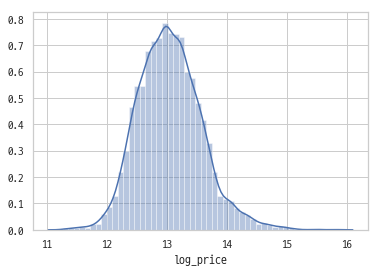

In [93]:
data['log_price'] = np.log1p(data['price'])
sns.distplot(data['log_price'])
plt.show()

# \# `Date` column

### Datetime ploting

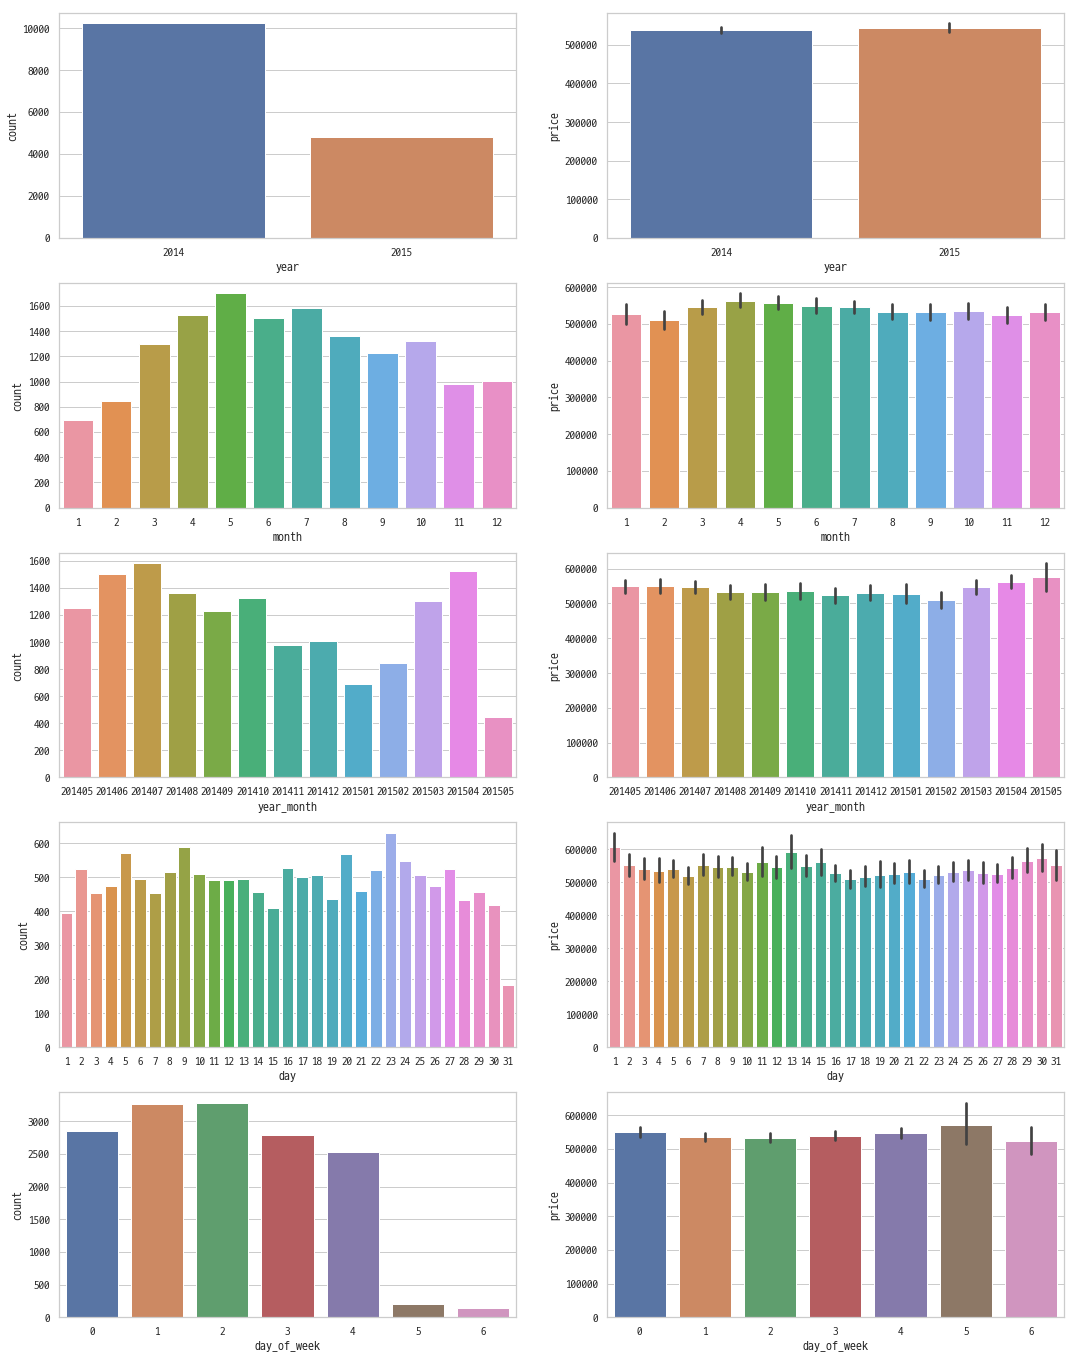

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(year_month_df['year_month'], year_month_df['log_price'])
plt.xticks(year_month_df['year_month'])
plt.show()figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(18, 24)

sns.countplot(data=data, x="year", ax=ax1)
sns.countplot(data=data, x="month", ax=ax3)
sns.countplot(data=data, x="year_month", ax=ax5)
sns.countplot(data=data, x="day", ax=ax7)
sns.countplot(data=data, x="day_of_week", ax=ax9)
sns.barplot(data=data, x="year", y="price", ax=ax2)
sns.barplot(data=data, x="month", y="price", ax=ax4)
sns.barplot(data=data, x="year_month", y="price", ax=ax6)
sns.barplot(data=data, x="day", y="price", ax=ax8)
sns.barplot(data=data, x="day_of_week", y="price", ax=ax10)
plt.show()

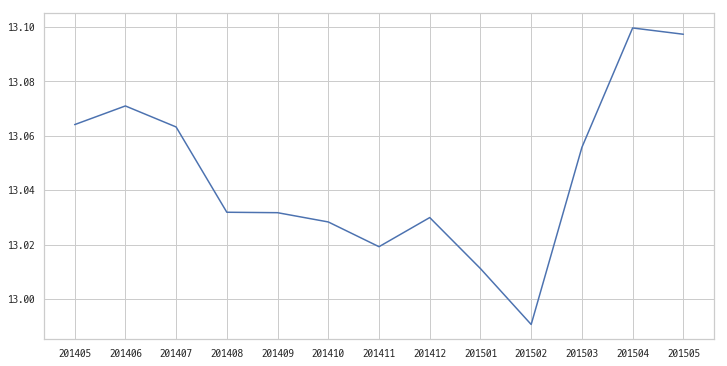

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(year_month_df['year_month'], year_month_df['log_price'])
plt.xticks(year_month_df['year_month'])
plt.show()

## `yr_built`

In [56]:
built_year = np.array(sorted(data['yr_built'].unique()))
built_year

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

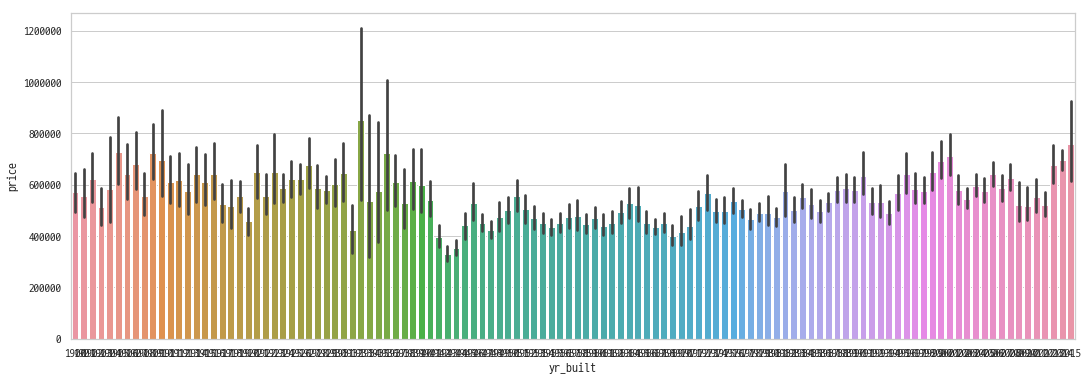

In [57]:
plt.figure(figsize=(18, 6))
sns.barplot(data=data, x="yr_built", y="price", order=built_year)
plt.show()

## `yr_renovated`

In [53]:
print(len(data[data['yr_renovated'] == 0]))
print(len(data[data['yr_renovated'] != 0]))

14333
626


- 재건축이 된 집은 전체의 4%밖에 안되므로 category data로 활용할 수 있을 것이라 생각

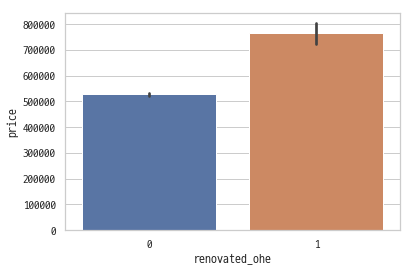

In [57]:
sns.barplot(data=data, x="renovated_ohe", y="price")
plt.show()

# \# House Conditions

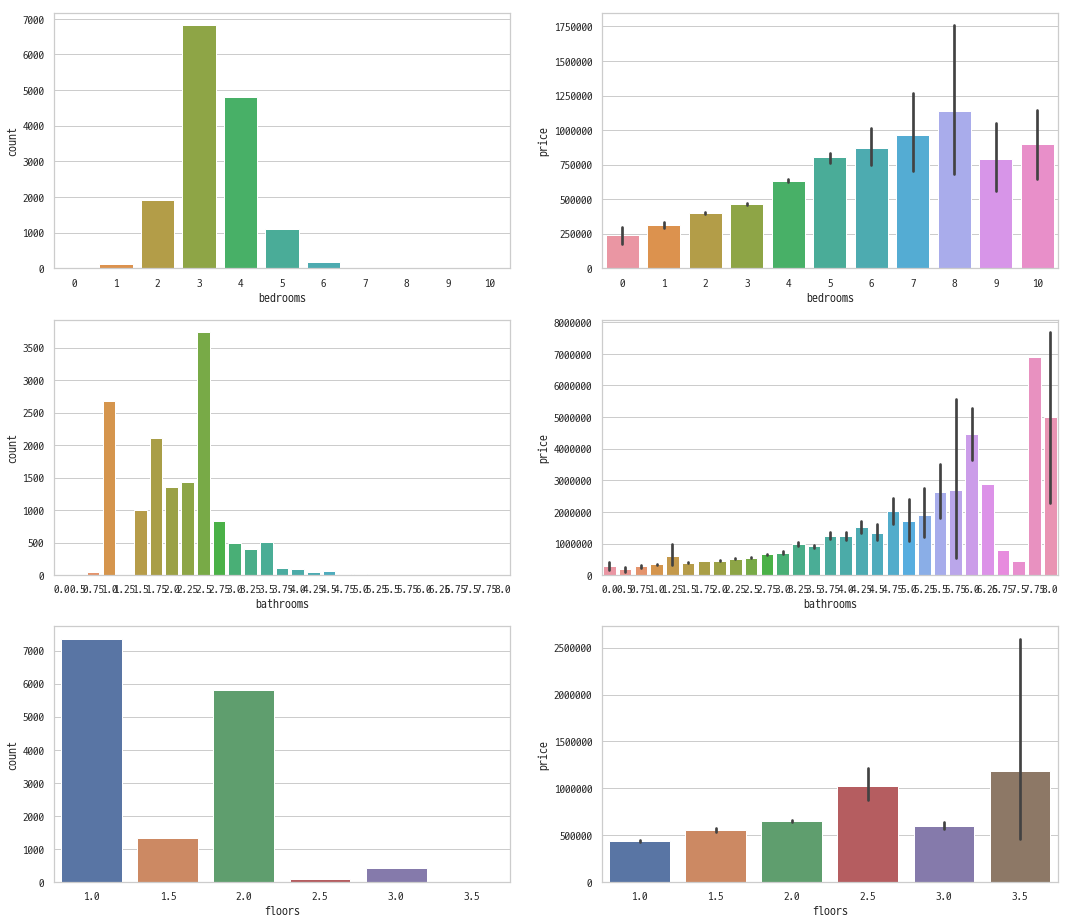

In [45]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 16)

sns.countplot(data=data, x='bedrooms', ax=ax1)
sns.barplot(data=data, x='bedrooms', y='price', ax=ax2)
sns.countplot(data=data, x='bathrooms', ax=ax3)
sns.barplot(data=data, x='bathrooms', y='price', ax=ax4)
sns.countplot(data=data, x='floors', ax=ax5)
sns.barplot(data=data, x='floors', y='price', ax=ax6)
plt.show()

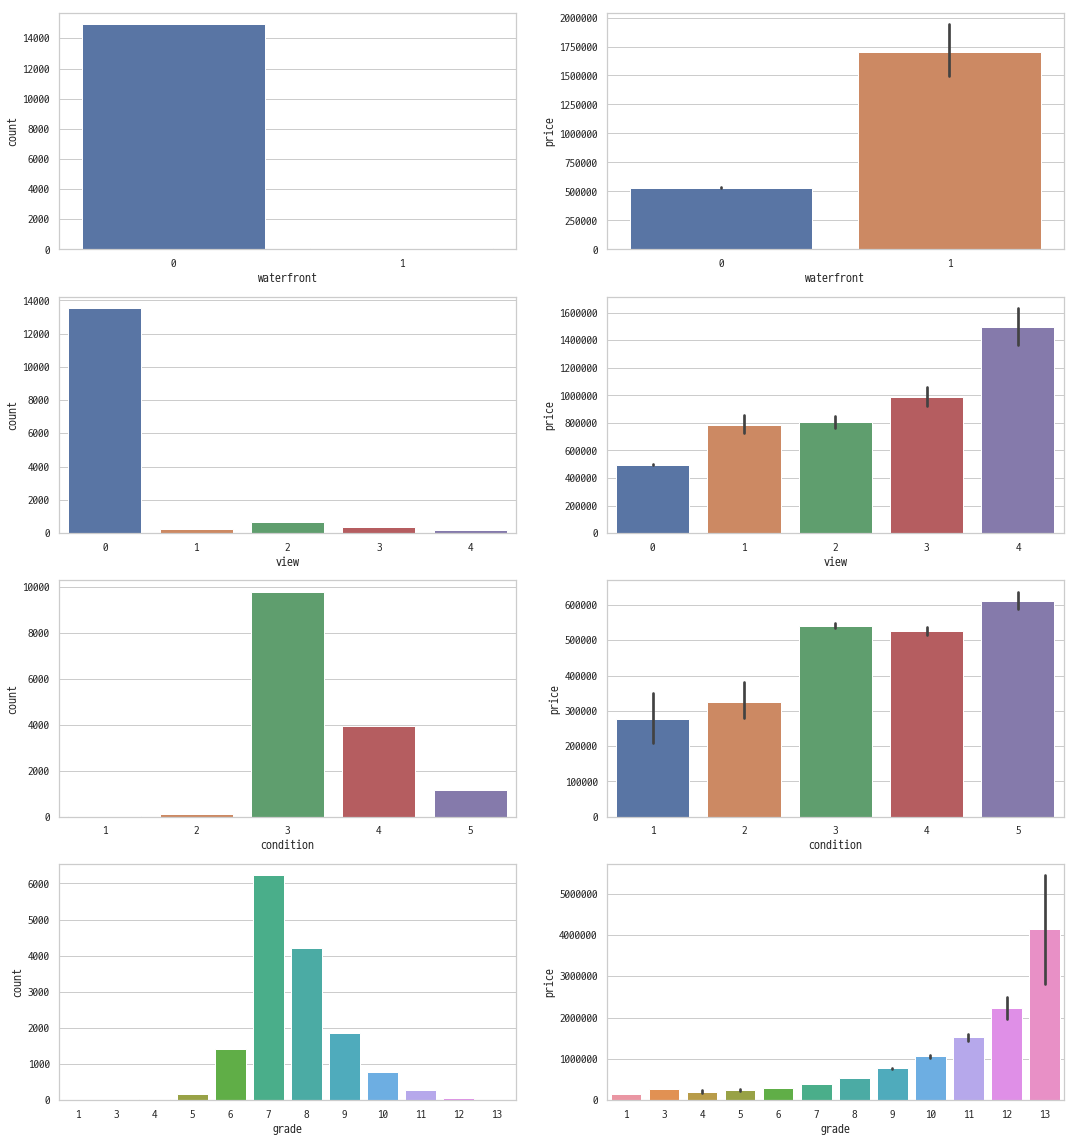

In [18]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18, 20)

sns.countplot(data=data, x='waterfront', ax=ax1)
sns.barplot(data=data, x='waterfront', y='price', ax=ax2)
sns.countplot(data=data, x='view', ax=ax3)
sns.barplot(data=data, x='view', y='price', ax=ax4)
sns.countplot(data=data, x='condition', ax=ax5)
sns.barplot(data=data, x='condition', y='price', ax=ax6)
sns.countplot(data=data, x='grade', ax=ax7)
sns.barplot(data=data, x='grade', y='price', ax=ax8)
plt.show()

# \# Location

## `zipcode`

In [58]:
data['zipcode'].min(), data['zipcode'].max()

(98001, 98199)

- zipcode는 `98001` ~ `98199` 사이로 이루어져있다. : 워싱턴주의 특정 구역

- 워싱턴주의 최고 집값을 가진 zipcodes : [washington state house price](https://www.propertyshark.com/Real-Estate-Reports/2017/10/04/expensive-zip-codes-washington-state-medina-homes-8x-pricier-u-s-median/)

![](zipcode.png)

#### 1등 동네 실제 확인

In [60]:
data['log_price'].describe().loc[["75%", "max"]]

75%    13.372694
max    15.492607
Name: log_price, dtype: float64

In [61]:
print("Mean: ", data[data['zipcode'] == 98039]['log_price'].mean())
data[data['zipcode'] == 98039]['log_price'][:10]

Mean:  14.433011105034357


id
2123    14.897316
3678    13.963931
5790    14.093142
6762    13.670485
6850    13.815511
7859    14.557448
8579    14.353611
8933    13.576619
9229    14.316892
9251    14.403297
Name: log_price, dtype: float64

In [83]:
zipcode_rank = data.groupby(['zipcode']).mean().sort_values(by=['price'], \
                                                              ascending=False).reset_index()[['zipcode', 'price']]
zipcode_rank['rank'] = range(1, len(zipcode_rank)+1)
zipcode_rank.head()

,zipcode,price,rank
0,98039,2.245862e+06,1
1,98004,1.397283e+06,2
2,98040,1.204216e+06,3
3,98112,1.118553e+06,4
4,98102,9.043680e+05,5


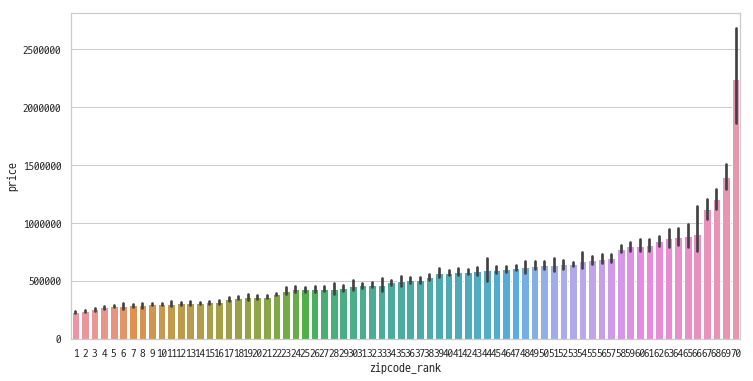

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="zipcode_rank", y="price")
plt.show()

## zipcode 값 조정해보기

- zipcode rank는 여전히 1~70 사이의 값으로 너무 큰 숫자이므로 standarization 해준다.
- 여기서 높은 rank의 집들은 price가 현저히 높으므로 가중치를 주기 위해서 exp를 씌워준다.

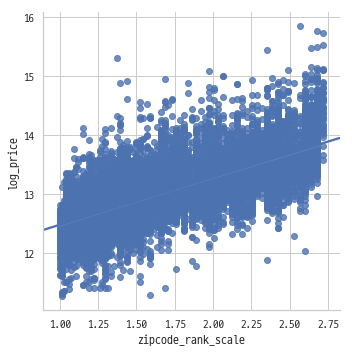

In [10]:
data['zipcode_rank_scale'] = np.exp((data['zipcode_rank'] - data.zipcode_rank.min()) \
                                        / (data.zipcode_rank.max() - data.zipcode_rank.min()))
# data.groupby('zipcode_rank_scale').mean().sort_values('price').reset_index()[['zipcode_rank_scale', 'price']]
sns.lmplot(data=data, x='zipcode_rank_scale', y='log_price')
plt.show()

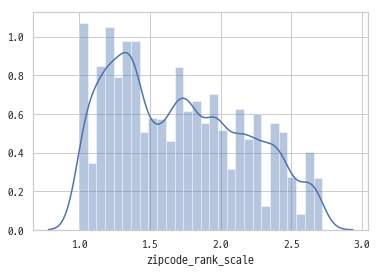

In [67]:
sns.distplot(data['zipcode_rank_scale'])
plt.show()

### `lat`, `long`

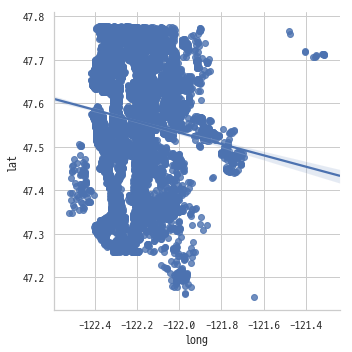

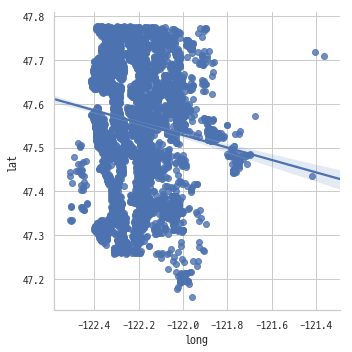

In [298]:
sns.lmplot(data=data, x='long', y='lat')
sns.lmplot(data=test, x='long', y='lat')
plt.show()

In [71]:
data[['lat', 'long']].describe()

,lat,long
count,14959.000000,14959.000000
mean,47.561127,-122.214295
std,0.137956,0.140654
min,47.155900,-122.515000
25%,47.473400,-122.329000
50%,47.572100,-122.231000
75%,47.678550,-122.126500
max,47.777600,-121.315000


- 편차가 너무 작아서 분리되기 어려울 수 있으므로 표준화를 통해 편차를 1로 만들어준다

# \# Areas

## `Basement`

In [17]:
data[areas].tail()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,,,,,,
15030,2520,6023,2520,0,2520,6023
15031,3510,7200,2600,910,2050,6200
15032,1530,1131,1530,0,1530,1509
15033,2310,5813,2310,0,1830,7200
15034,1020,1076,1020,0,1020,1357


- `sqft_basement` : 지하실이 없는 경우 0

In [18]:
len(data[data['sqft_basement'] == 0]) / len(data)

0.6081143997339541

- 약 60%의 데이터가 지하실이 없다
- 지하실이 있고 없고의 category를 만들어서 사용할 수 있다

### \# Issue
- `sqft_living` = `sqft_above` + `sqft_basement`


- 이 세 컬럼은 선형 종속관계


- linear가 아니라면 다 갖고가도 상관 없을 거라 판단

## `sqft_living`, `sqft_lot` : 15 or not?

In [25]:
living_lot = ['log_price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
data[living_lot].head()

,log_price,sqft_living,sqft_living15,sqft_lot,sqft_lot15
id,,,,,
0,12.309982,1180,1340,5650,5650
1,12.100712,770,2720,10000,8062
2,13.142166,1680,1800,8080,7503
3,12.458775,1715,2238,6819,6819
4,12.583995,1060,1650,9711,9711


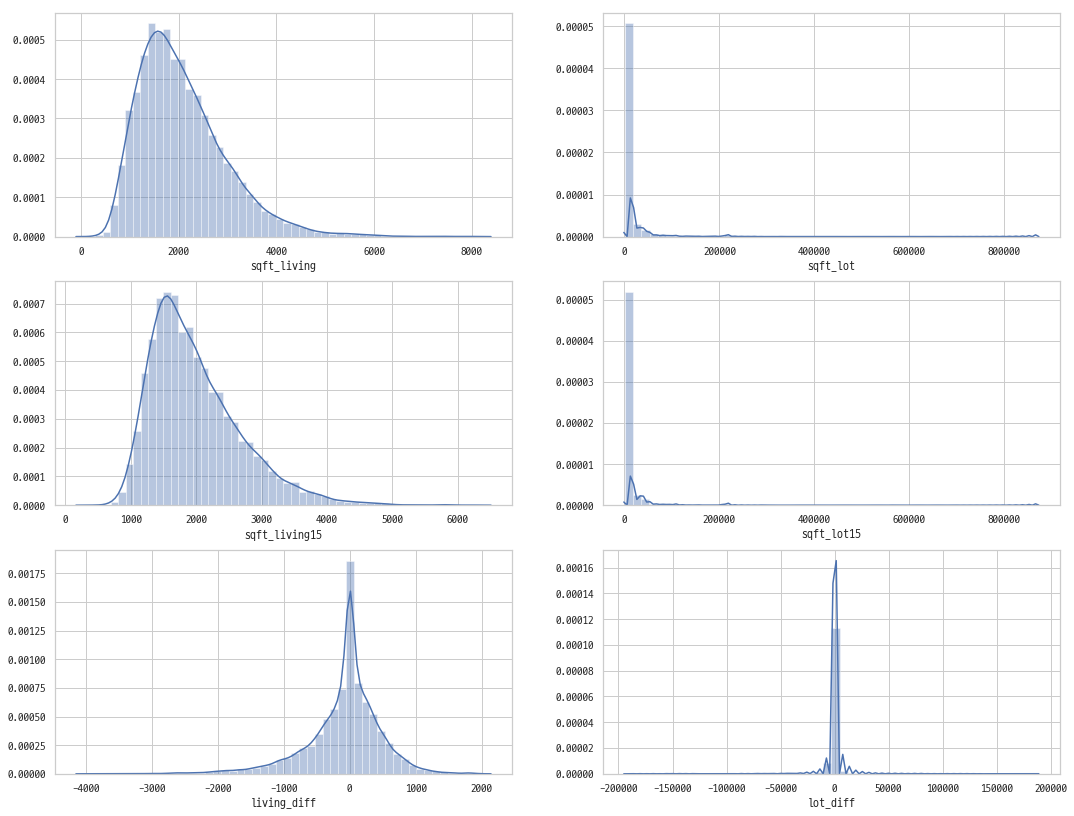

In [40]:
figure, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 14)

sns.distplot(data['sqft_living'], ax=ax1)
sns.distplot(data['sqft_living15'], ax=ax2)
sns.distplot(data['living_diff'], ax=ax3)
sns.distplot(data['sqft_lot'], ax=ax4)
sns.distplot(data['sqft_lot15'], ax=ax5)
sns.distplot(data['lot_diff'], ax=ax6)
plt.show()

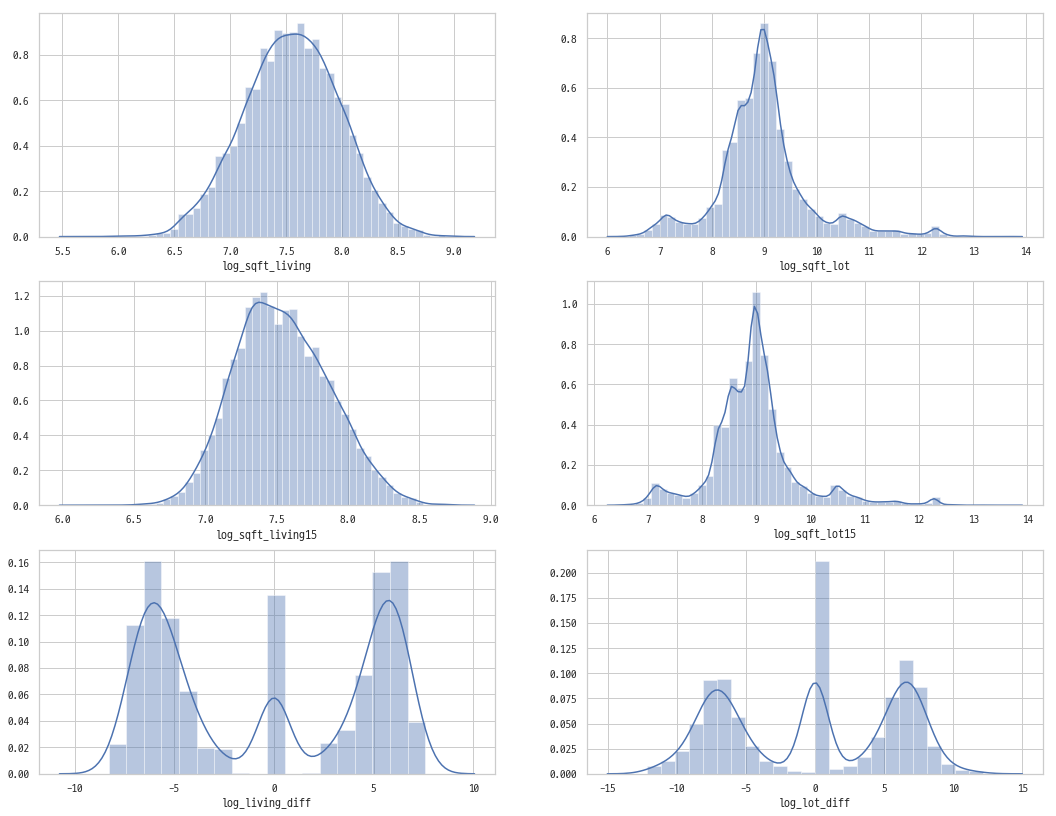

In [42]:
figure, ((ax1, ax4), (ax2, ax5), (ax3, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 14)

sns.distplot(data['log_sqft_living'], ax=ax1)
sns.distplot(data['log_sqft_living15'], ax=ax2)
sns.distplot(data['log_living_diff'], ax=ax3)
sns.distplot(data['log_sqft_lot'], ax=ax4)
sns.distplot(data['log_sqft_lot15'], ax=ax5)
sns.distplot(data['log_lot_diff'], ax=ax6)
plt.show()

---

# Linear Models

## \#SUBMISSION 1 : row data

In [47]:
row_scores

,RMSLE,R2 score
LinearRegression,205223.4818,0.6936
Ridge,205220.3373,0.6936
Lasso,205223.6918,0.6936


## \#SUBMISSION 2 : `price` log변환

In [73]:
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.2532,0.7687,196862.165389
Ridge,0.2532,0.7687,181329.072491
Lasso,0.3594,0.5338,468841.118630


- log변환만으로 차이가 크게 남

## \#SUBMISSION 3 : `price` log변환 + `zipcode_rank`

In [98]:
# zipcode_rank
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.2025,0.8521,270563.865251
Ridge,0.2025,0.8521,209974.610284
Lasso,0.2507,0.7734,373853.857683


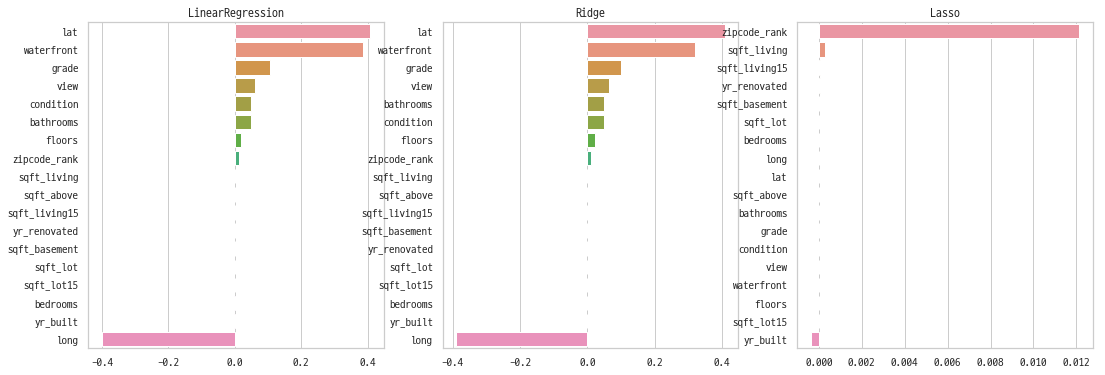

In [100]:
draw_coefs(models)

## \#SUBMISSION 4 : `price` log변환 + `zipcode_rank_scale`

In [149]:
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.2050,0.8484,153744.763375
Ridge,0.2050,0.8484,151000.559728
Lasso,0.3619,0.5270,239663.448400


- `zipcode_rank_scale`은 오히려 떨어뜨린다


- **`[Question]`** linear에서도 scaling이 무조건 좋은 것은 아닌가? 

## \#SUBMISSION 5 : `price` log변환 + `zipcode_rank` + `2015_or_not` + `year_month`

- `2015_or_not` , `year_month`는 각각 하나씩 했을 때와 둘 다 넣었을 때 성능이 똑같다.

In [248]:
# zipcode_rank + year_month_scale + 2015_or_not
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.2010,0.8542,248981.859047
Ridge,0.2010,0.8542,171817.104157
Lasso,0.2507,0.7734,242814.656937


- 효과 있고!

## \#SUBMISSION 6 : 5번에 plus
### + `sqft_living_scale`, `sqft_lot_scale`, `sqft_living15_scale` + `sqft_lot15_scale`

In [282]:
# zipcode_rank + living_scale + lot_scale + living15_scale + lot15_scale
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.1985,0.8579,141586.514982
Ridge,0.1985,0.8579,147464.263133
Lasso,0.2516,0.7717,446872.207562


- 효과 있고!

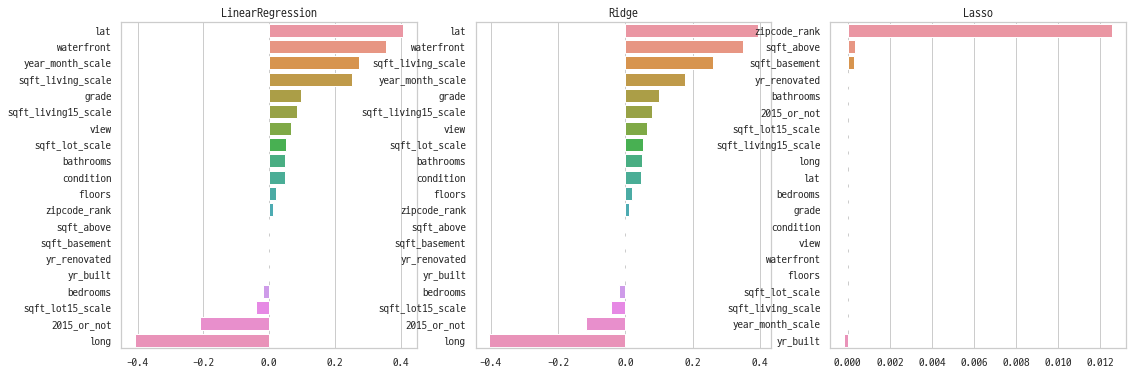

In [284]:
draw_coefs(models)

## \#SUBMISSION 7 : 5번에 plus
### + `sqft_living_scale`, `sqft_lot_scale`, `sqft_living15_scale` + `sqft_lot15_scale`
### + `lat_scale` + `long_scale`

In [289]:
# zipcode_rank + area_scale + latlong_scale
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.1985,0.8579,139028.296501
Ridge,0.1985,0.8579,146543.333382
Lasso,0.2516,0.7717,438398.973706


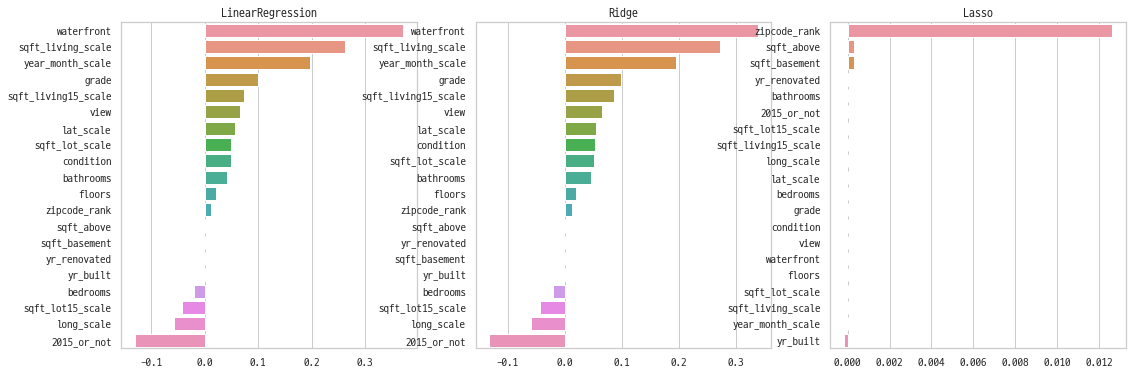

In [291]:
draw_coefs(models)

- 점수가 직접적으로 오르진 않았으나 계수가 너무 큰 것이 조정된 듯
- **`[Question]`** scaling을 하는 것이 맞는가, 아닌가?

## \#SUBMISSION 8 : 5번에 plus
### + `sqft_living_scale`, `sqft_lot_scale`, `sqft_living15_scale` + `sqft_lot15_scale`
### + `lat_scale` + `long_scale`
### + `yr_built_scale` + `yr_renovated_scale`

In [478]:
# zipcode_rank + area_scale + latlong_scale + yr_scale
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.1985,0.8579,138496.001722
Ridge,0.1985,0.8579,137299.789657
Lasso,0.2534,0.7685,184564.884453


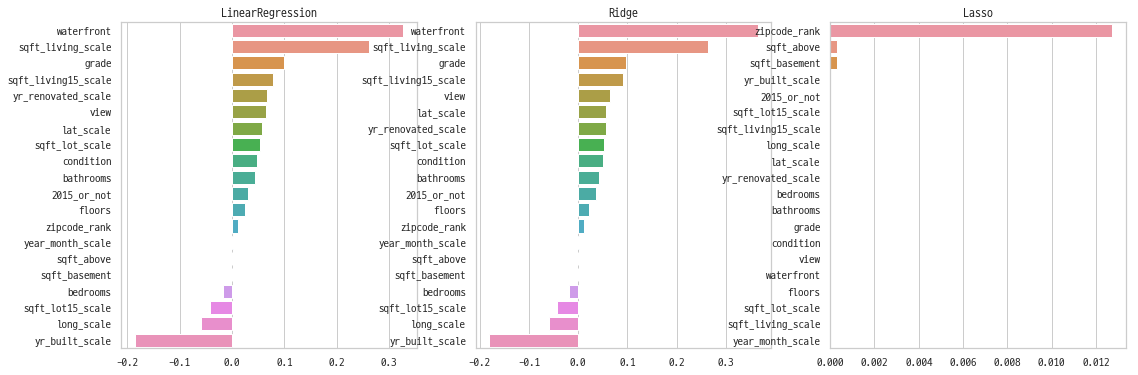

In [480]:
draw_coefs(models)

- 역시 점수가 직접적으로 오르진 않았으나 계수들이 점점 생기고 있다. 
- **`[Question]`** feature들이 의미를 가진다는 말로 해석해도 되는가? 의미 있는 scaling인가?

## \#SUBMISSION 9 : 5번에 plus
### + `sqft_living_scale`, `sqft_lot_scale`, `sqft_living15_scale` + `sqft_lot15_scale`
### + `lat_scale` + `long_scale`
### + `yr_built_scale` + `yr_renovated_scale`
### + `sqft_above_scale` + `sqft_basement_scale`

In [397]:
# zipcode_rank + area_scale + latlong_scale + yr_scale + above_basement_scale
row_scores

,RMSLE,R2 score,RMSE
LinearRegression,0.1994,0.8565,144229.374894
Ridge,0.1994,0.8565,133759.070748
Lasso,0.3734,0.4968,286678.739089


- `above`, `basement`들은 scaling하면 성능이 오히려 떨어진다. 
- 그렇다고 빼도 떨어지고, area feature들은 하나라도 빼면 성능이 떨어진다. 
- **`[Question]`** living과 living15 같은경우에는 상관성이 높아서 다중공선성 문제가 있을 수도 있는데, 중요 feature라서 인듯 하다. 왜?

# Hyper Parameter Tuning - Ridge

In [536]:
param_grid = {
    'alpha': [4.5, 5, 5.5]
}

grid_model, params_df, rmsle = BestParamsGrid(ridge, train, label, param_grid)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   6 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.2s finished


In [537]:
params_df

,params,RMSLE
1,{'alpha': 5},0.198409
0,{'alpha': 4.5},0.198409
2,{'alpha': 5.5},0.198410


# Hyper Parameter Tuning - Lasso

In [548]:
param_grid = {
    'alpha': [0.00005, 0.00006, 0.00007, 0.00008]
}

grid_model, params_df, rmsle = BestParamsGrid(lasso, train, label, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    0.5s finished


In [549]:
params_df

,params,RMSLE
1,{'alpha': 6e-05},0.198416
0,{'alpha': 5e-05},0.198416
2,{'alpha': 7e-05},0.198416
3,{'alpha': 8e-05},0.198416


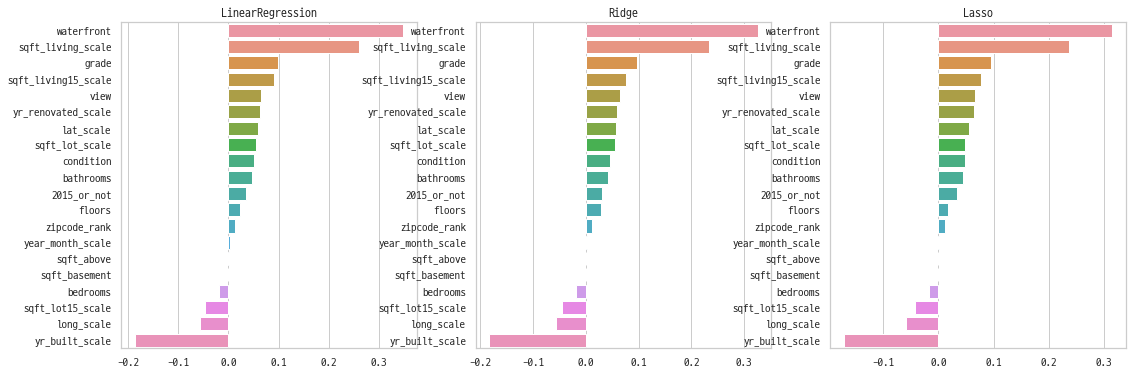

In [554]:
draw_coefs(models)

> Submission: 147935

# Tree Models

## \#SUBMISSION 1 : row data + blending (LGBM, XGB, GB)

In [421]:
row_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', \
                'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', \
                'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

row_train = data[row_features]
row_label = data['price']

In [429]:
row_scores

,RMSLE,R2 score
LGBMRegressor,128596.0435,0.8795
XGBRegressor,138040.3220,0.8604
GradientBoostingRegressor,139118.3285,0.8587
RandomForestRegressor,143556.8579,0.8554
LinearRegression,205223.4818,0.6936
Ridge,205220.3373,0.6936
Lasso,205223.6918,0.6936


> Submission : 127945

## \#SUBMISSION 2 : `price` log 처리 + blending (LGBM, XGB, GB)

In [435]:
row_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', \
                'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', \
                'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

row_train = row_data[row_features]
row_data['log_price'] = np.log1p(row_data.price)
row_label = row_data['log_price']

In [439]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1666,0.8999,109729.327395
GradientBoostingRegressor,0.1841,0.8779,144937.489634
XGBRegressor,0.1860,0.8753,129642.090425
RandomForestRegressor,0.1888,0.8729,148516.106882
LinearRegression,0.2532,0.7687,295484.260523
Ridge,0.2532,0.7687,179273.596296
Lasso,0.3594,0.5338,319074.680311


> Submission 결과 : 127781

## \#SUBMISSION 3 : `price` log 처리 + LightGBM 만 사용

In [390]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1666,0.8999,115280.225479
GradientBoostingRegressor,0.1841,0.8778,142134.984610
XGBRegressor,0.1860,0.8753,144708.462969
RandomForestRegressor,0.1882,0.8729,125718.488111
LinearRegression,0.2532,0.7687,201826.723238
Ridge,0.2532,0.7687,177429.751425
Lasso,0.3594,0.5338,510114.437763


> Submission 결과 : 114322

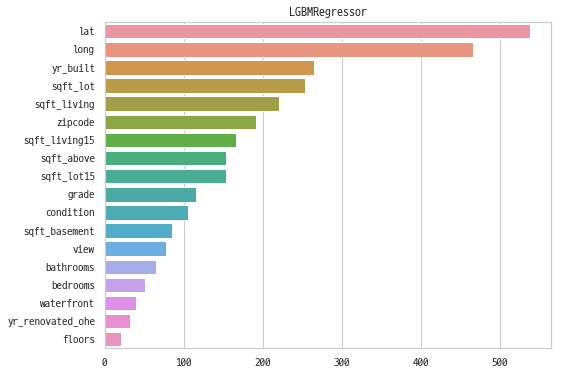

In [211]:
draw_importances(lightgbm, train)

## \#SUBMISSION 4 : `zipcode` → `zipcode_rank`

In [238]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1669,0.8995,117368.906974
GradientBoostingRegressor,0.1841,0.8777,136638.546082
XGBRegressor,0.1854,0.8759,178527.900646


> Submission : 115110

- 성능이 오히려 떨어졌다

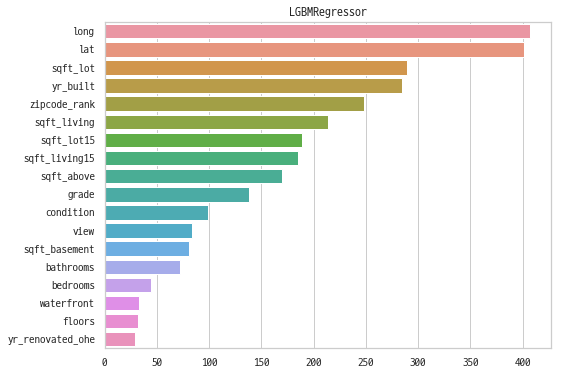

In [23]:
draw_importances(lightgbm, train)

## \#SUBMISSION 5 : 3번 +`yr_renovated_ohe`

In [238]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1669,0.8995,117368.906974
GradientBoostingRegressor,0.1841,0.8777,136638.546082
XGBRegressor,0.1854,0.8759,178527.900646


> Submission 결과 : 115033

- 역시 성능이 오히려 떨어졌다

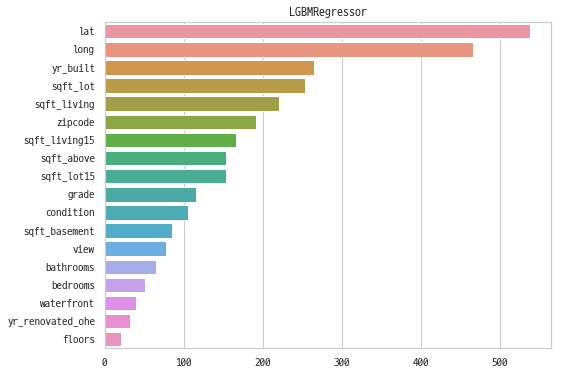

In [211]:
draw_impor- 성능이 오히려 떨어졌다tances(lightgbm, train)

---

## \#SUBMISSION 6 : 3번 + `year_month`

In [393]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1634,0.9033,121344.899765
XGBRegressor,0.1831,0.8786,131035.538895
GradientBoostingRegressor,0.1831,0.8785,125378.071093
RandomForestRegressor,0.1878,0.8739,120613.126149
LinearRegression,0.2510,0.7717,177622.786772
Ridge,0.2510,0.7717,182631.804389
Lasso,0.3586,0.5339,249896.050268


> Submission 결과 : 113112

- 크게 효과 있음!

---

# \# Hyper Parameter Tuning - `LightGBM`

In [393]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1634,0.9033,121344.899765
XGBRegressor,0.1831,0.8786,131035.538895
GradientBoostingRegressor,0.1831,0.8785,125378.071093
RandomForestRegressor,0.1878,0.8739,120613.126149
LinearRegression,0.2510,0.7717,177622.786772
Ridge,0.2510,0.7717,182631.804389
Lasso,0.3586,0.5339,249896.050268


## 1) GridSearchCV -1

In [211]:
param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [10, 30, 50, 80, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
}

lgbm = LGBMRegressor()
grid_lgbm, params_df, rmsle = BestParamsGrid(lgbm, train, label, param_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   16.4s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  3.9min finished


In [251]:
results = pd.DataFrame(grid_lgbm.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(10):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200} 	RMSE: 0.1618
2: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 200} 	RMSE: 0.162
3: {'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 200} 	RMSE: 0.162
4: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200} 	RMSE: 0.162
5: {'learning_rate': 0.1, 'max_depth': 80, 'n_estimators': 200} 	RMSE: 0.162
6: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500} 	RMSE: 0.162
7: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 500} 	RMSE: 0.1623
8: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 500} 	RMSE: 0.1623
9: {'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 500} 	RMSE: 0.1623
10: {'learning_rate': 0.1, 'max_depth': 80, 'n_estimators': 500} 	RMSE: 0.1623


## 2) GridSearchCV -2

In [256]:
param_grid = {
    'n_estimators': [300, 350, 400, 450, 500],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12],
}

lgbm = LGBMRegressor()
grid_lgbm, params_df, rmsle = BestParamsGrid(lgbm, train, label, param_grid)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   41.7s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  4.6min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  6.6min
[Parallel(n_jobs=5)]: Done 1800 out of 1800 | elapsed:  8.0min finished


In [257]:
results = pd.DataFrame(grid_lgbm.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(10):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.06, 'max_depth': 15, 'n_estimators': 500} 	RMSE: 0.1608
2: {'learning_rate': 0.06, 'max_depth': 15, 'n_estimators': 450} 	RMSE: 0.1608
3: {'learning_rate': 0.06, 'max_depth': 20, 'n_estimators': 500} 	RMSE: 0.1609
4: {'learning_rate': 0.06, 'max_depth': 50, 'n_estimators': 500} 	RMSE: 0.1609
5: {'learning_rate': 0.06, 'max_depth': 35, 'n_estimators': 500} 	RMSE: 0.1609
6: {'learning_rate': 0.06, 'max_depth': 25, 'n_estimators': 500} 	RMSE: 0.1609
7: {'learning_rate': 0.06, 'max_depth': 40, 'n_estimators': 500} 	RMSE: 0.1609
8: {'learning_rate': 0.06, 'max_depth': 45, 'n_estimators': 500} 	RMSE: 0.1609
9: {'learning_rate': 0.06, 'max_depth': 30, 'n_estimators': 500} 	RMSE: 0.1609
10: {'learning_rate': 0.06, 'max_depth': 15, 'n_estimators': 400} 	RMSE: 0.161


## 3) FinerSearchCV 

In [274]:
param_grid = {
    'n_estimators': [450, 550],
    'max_depth': [15, 40],
    'learning_rate': [0.055, 0.065],
}

lgbm_finer = FinerSearch(train, label, param_grid, 'lgbm', 100)

Let's start				 21:10:48
1 epoch is now calculating . . .	 21:10:51
10 epoch is now calculating . . .	 21:11:10
20 epoch is now calculating . . .	 21:11:32
30 epoch is now calculating . . .	 21:11:55
40 epoch is now calculating . . .	 21:12:17
50 epoch is now calculating . . .	 21:12:40
60 epoch is now calculating . . .	 21:13:02
70 epoch is now calculating . . .	 21:13:25
80 epoch is now calculating . . .	 21:13:47
90 epoch is now calculating . . .	 21:14:10
100 epoch is now calculating . . .	 21:14:32
All Coarse Searching is Finished
time duration: 0:03:44
(100, 5)


In [298]:
lgbm_finer.head(10).describe()

,epoch,learning_rate,max_depth,n_estimators,score
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,54.400000,0.057212,16.500000,485.200000,0.159846
std,30.869618,0.001455,1.269296,16.198765,0.000075
min,5.000000,0.055727,15.000000,450.000000,0.159749
25%,32.250000,0.056004,16.000000,483.500000,0.159780
50%,49.000000,0.056487,16.000000,491.500000,0.159845
75%,83.000000,0.058558,17.000000,495.750000,0.159917
max,97.000000,0.059654,19.000000,499.000000,0.159927


> Submission : 113879

## 4) Grid Search Again..

In [110]:
param_grid = {
    'n_estimators': [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000],
    'max_depth': [5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80],
    'learning_rate': [0.03, 0.04, 0.05, 0.055, 0.06, 0.065, 0.07, 0.08]
}

lgbm = LGBMRegressor()
grid_lgbm, params_df, rmsle = BestParamsGrid(lgbm, train, label, param_grid)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.6s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  4.8min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed: 10.8min
[Parallel(n_jobs=5)]: Done 1975 tasks      | elapsed: 14.7min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed: 19.2min
[Parallel(n_jobs=5)]: Done 3271 tasks      | elapsed: 24.1min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 29.5min
[Parallel(n_jobs=5)]: Done 4891 tasks      | elapsed: 35.4min
[Parallel(n_jobs=5)]: Done 5822 tasks      | elapsed: 41.8min
[Parallel(n_jobs=5)]: Done 6835 tasks      | elapsed: 48.7min
[Parallel(n_jobs=5)]: Done 7928 tasks      | elapsed: 57.5min
[Parallel(n_jobs=5)]: Done 9103 tasks      | elapsed: 67.2min

In [113]:
results = pd.DataFrame(grid_lgbm.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(20):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 900} 	RMSE: 0.1605
2: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 850} 	RMSE: 0.1605
3: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 800} 	RMSE: 0.1605
4: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 850} 	RMSE: 0.1605
5: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 900} 	RMSE: 0.1606
6: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 950} 	RMSE: 0.1606
7: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 800} 	RMSE: 0.1606
8: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 1000} 	RMSE: 0.1606
9: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 750} 	RMSE: 0.1606
10: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 950} 	RMSE: 0.1606
11: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 750} 	RMSE: 0.1606
12: {'learning_rate': 0.03, 'max_depth': 9, 'n_estimators': 1000} 	RMSE: 0.1607
13: {'learning_rate': 0.04, 'max_depth': 13, 'n_estima

In [115]:
param_grid = {
    'n_estimators': [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200],
    'max_depth': [7, 9, 11, 13, 15, 17, 19, 21],
    'learning_rate': [0.03, 0.035, 0.04, 0.045, 0.05]
}

lgbm = LGBMRegressor()
grid_lgbm, params_df, rmsle = BestParamsGrid(lgbm, train, label, param_grid)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   26.2s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  4.4min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done 1003 tasks      | elapsed: 11.9min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed: 16.9min
[Parallel(n_jobs=5)]: Done 1800 out of 1800 | elapsed: 21.0min finished


In [116]:
results = pd.DataFrame(grid_lgbm.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(10):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.035, 'max_depth': 7, 'n_estimators': 900} 	RMSE: 0.1605
2: {'learning_rate': 0.035, 'max_depth': 7, 'n_estimators': 950} 	RMSE: 0.1605
3: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 900} 	RMSE: 0.1605
4: {'learning_rate': 0.04, 'max_depth': 15, 'n_estimators': 850} 	RMSE: 0.1605
5: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 800} 	RMSE: 0.1605
6: {'learning_rate': 0.035, 'max_depth': 11, 'n_estimators': 950} 	RMSE: 0.1605
7: {'learning_rate': 0.035, 'max_depth': 11, 'n_estimators': 900} 	RMSE: 0.1605
8: {'learning_rate': 0.04, 'max_depth': 9, 'n_estimators': 850} 	RMSE: 0.1605
9: {'learning_rate': 0.035, 'max_depth': 11, 'n_estimators': 1000} 	RMSE: 0.1605
10: {'learning_rate': 0.035, 'max_depth': 7, 'n_estimators': 1000} 	RMSE: 0.1606


> Submission : 110482

# \# Hyper Parameter Tuning - `XGBoost`

In [393]:
row_scores

,RMSLE,R2 score,RMSE
LGBMRegressor,0.1634,0.9033,121344.899765
XGBRegressor,0.1831,0.8786,131035.538895
GradientBoostingRegressor,0.1831,0.8785,125378.071093
RandomForestRegressor,0.1878,0.8739,120613.126149
LinearRegression,0.2510,0.7717,177622.786772
Ridge,0.2510,0.7717,182631.804389
Lasso,0.3586,0.5339,249896.050268


## 1) GridSearchCV -1

In [42]:
param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [10, 30, 50, 80, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
}

xgb = XGBRegressor()
grid_xgb, params_df, rmsle = BestParamsGrid(xgb, train, label, param_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   46.8s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  9.5min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed: 27.6min
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed: 30.5min finished


In [43]:
results = pd.DataFrame(grid_xgb.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(10):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000} 	RMSE: 0.1623
2: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 800} 	RMSE: 0.1634
3: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200} 	RMSE: 0.1638
4: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500} 	RMSE: 0.1641
5: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 800} 	RMSE: 0.1642
6: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000} 	RMSE: 0.1642
7: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 1000} 	RMSE: 0.1656
8: {'learning_rate': 0.01, 'max_depth': 80, 'n_estimators': 1000} 	RMSE: 0.1657
9: {'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 1000} 	RMSE: 0.1657
10: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000} 	RMSE: 0.1659


## 2) GridSearchCV -2

In [44]:
param_grid = {
    'n_estimators': [500, 600, 700, 800, 900, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
}

xgb = XGBRegressor()
grid_xgb, params_df, rmsle = BestParamsGrid(xgb, train, label, param_grid)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 29.0min
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed: 64.0min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed: 92.2min
[Parallel(n_jobs=5)]: Done 900 out of 900 | elapsed: 110.9min finished


In [45]:
results = pd.DataFrame(grid_xgb.cv_results_)
results['RMSE'] = np.sqrt(-1 * results.mean_test_score)
results = results.sort_values('RMSE').reset_index(inplace=False)
for i in range(10):
    print("{}:".format(i+1), results.loc[i]['params'], \
          "\tRMSE:", np.round(results.loc[i]['RMSE'], 4))

1: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 800} 	RMSE: 0.1618
2: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 600} 	RMSE: 0.1619
3: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 700} 	RMSE: 0.1619
4: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 900} 	RMSE: 0.1619
5: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 1000} 	RMSE: 0.1619
6: {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 500} 	RMSE: 0.162
7: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500} 	RMSE: 0.1622
8: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000} 	RMSE: 0.1623
9: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 600} 	RMSE: 0.1623
10: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 700} 	RMSE: 0.1624


## 3) FinerSearchCV 

In [49]:
param_grid = {
    'n_estimators': [700, 900],
    'max_depth': [7, 13],
    'learning_rate': [0.02, 0.04],
}

xgb_finer_1 = FinerSearch(train, label, param_grid, 'xgb', 300)

Let's start				
1 epoch is now calculating . . .	 0:00:59
30 epoch is now calculating . . .	 0:26:26
60 epoch is now calculating . . .	 0:53:49
90 epoch is now calculating . . .	 1:19:52
120 epoch is now calculating . . .	 1:46:15
150 epoch is now calculating . . .	 2:12:40
180 epoch is now calculating . . .	 2:38:49
210 epoch is now calculating . . .	 3:04:50
240 epoch is now calculating . . .	 3:29:12
270 epoch is now calculating . . .	 3:54:20
300 epoch is now calculating . . .	 4:19:53
All Coarse Searching is Finished
time duration: 4:19:53
(300, 5)


In [50]:
xgb_finer_1.head()

,epoch,learning_rate,max_depth,n_estimators,score
108,109,0.039390,7,793,0.159340
240,241,0.033561,7,813,0.159378
281,282,0.028396,8,778,0.159389
84,85,0.033804,8,872,0.159414
95,96,0.039124,7,765,0.159415


> Submission : 107728